In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import geopandas as gpd
warnings.filterwarnings('ignore')

## Data exploration

In [24]:
df = pd.read_csv('earthquakes.csv')

In [25]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

## Dropping data
We can see that alert, location, continent and country have null values so we will drop those, we also have lat and long so we will just use that instead.

In [27]:
df.isnull().mean() * 100

title         0.000000
magnitude     0.000000
date_time     0.000000
cdi           0.000000
mmi           0.000000
alert        46.930946
tsunami       0.000000
sig           0.000000
net           0.000000
nst           0.000000
dmin          0.000000
gap           0.000000
magType       0.000000
depth         0.000000
latitude      0.000000
longitude     0.000000
location      0.639386
continent    73.657289
country      38.107417
dtype: float64

In [28]:
df.drop(['title', 'continent', 'alert','location'],axis = 1,inplace = True)

Making a year and month column because date_time could give some problems in future,

In [29]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['Year'] = pd.DatetimeIndex(df['date_time']).year
df['Month'] = pd.DatetimeIndex(df['date_time']).month
df.drop('date_time', axis=1, inplace=True)

## Data analisis

In 63.6 percent of earthquakes tsunamis aren't present.


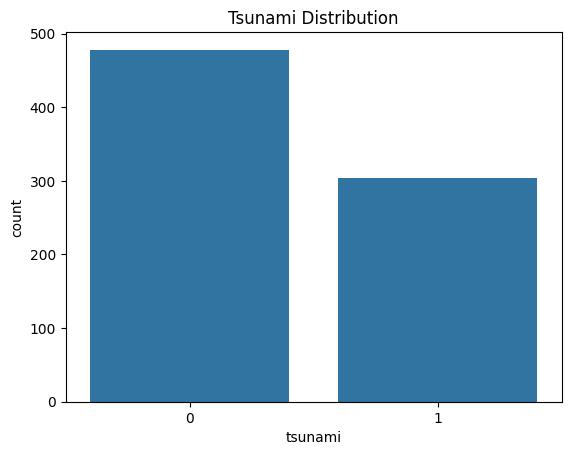

In [30]:
sns.countplot(x = 'tsunami',data = df)
plt.title('Tsunami Distribution');
percentage = round((df['tsunami'] == 1).mean() / (df['tsunami'] == 0).mean() * 100, 1)
print(f"In {percentage} percent of earthquakes tsunamis aren't present.")

earthquakes usually have a magnitude of 6.5 to 6.7

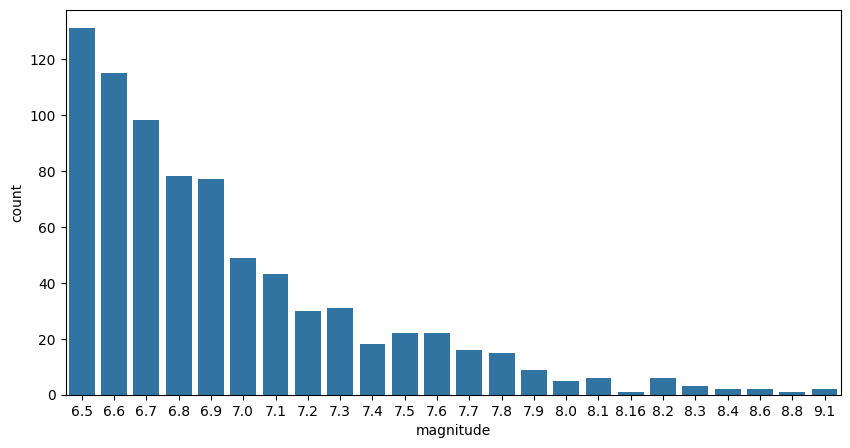

In [10]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'magnitude', data = df);

Indonesia has the highest number of earthquakes by far but Papua New Guinea and Vanuatu has a very high risk of tsunamis following an earthquake.

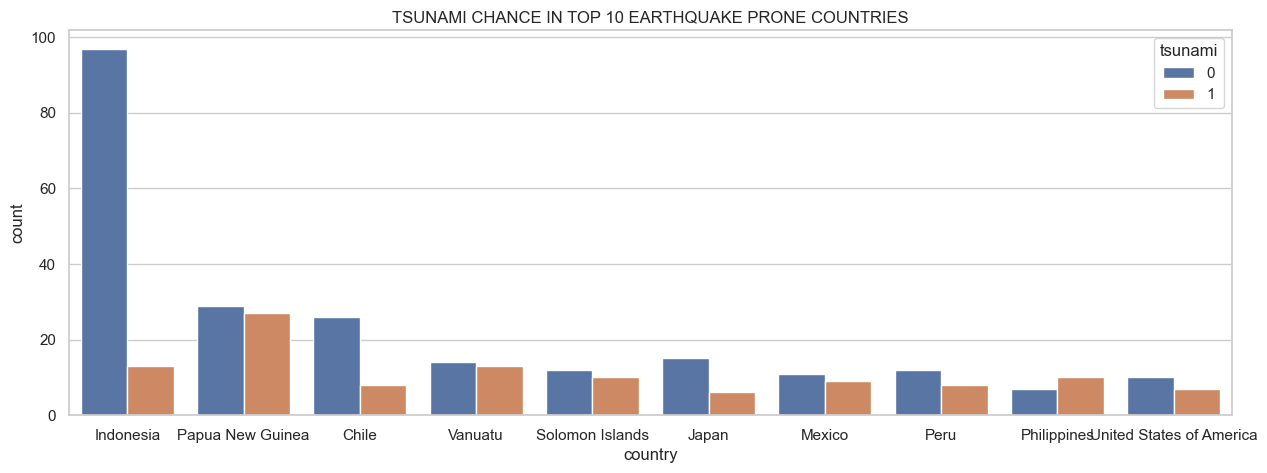

In [178]:
o = df['country'].value_counts().head(10).index
plt.figure(figsize = (15,5))
sns.countplot(x = 'country', data = df, order = o, hue = 'tsunami')
plt.title('TSUNAMI CHANCE IN TOP 10 EARTHQUAKE PRONE COUNTRIES');

No liniar correlation beween mag and tsunami.

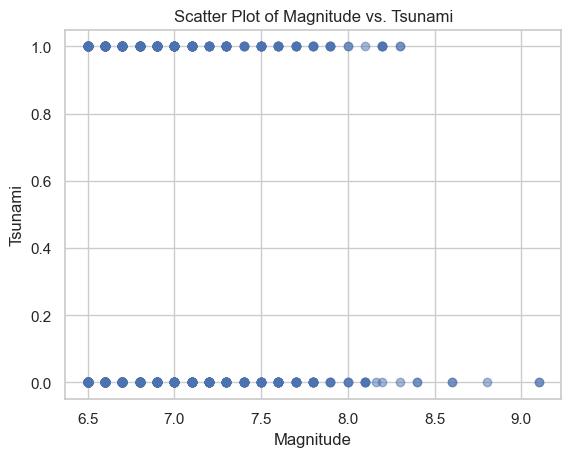

Correlation between mag and tsunami: -0.00


In [179]:
plt.scatter(df['magnitude'], df['tsunami'], alpha=0.5)
plt.title('Scatter Plot of Magnitude vs. Tsunami')
plt.xlabel('Magnitude')
plt.ylabel('Tsunami')

plt.show()

correlation = df['magnitude'].corr(df['tsunami'])
print(f'Correlation between mag and tsunami: {correlation:.2f}')

Also no linair corrolation between depth and tsunami.

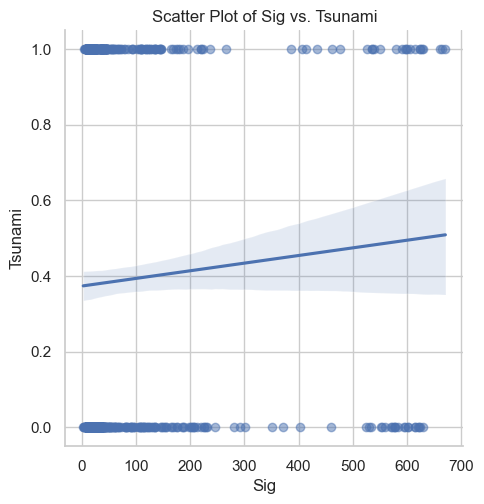

Correlation between sig and tsunami: -0.02


In [180]:
sns.lmplot(x='depth', y='tsunami', data=df, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Sig vs. Tsunami')
plt.xlabel('Sig')
plt.ylabel('Tsunami')

plt.show()

correlation = df['sig'].corr(df['tsunami'])
print(f'Correlation between sig and tsunami: {correlation:.2f}')

And no liniar correlation beween cdi and tsunami.

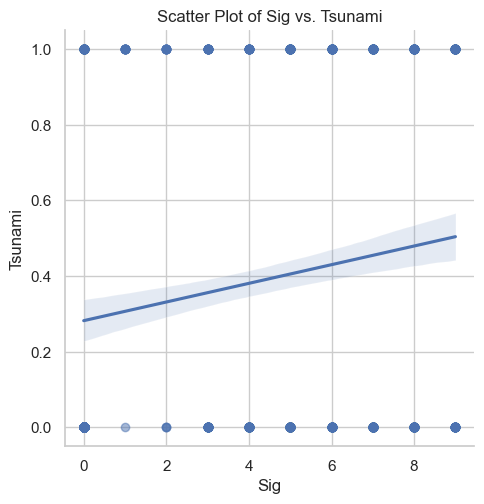

Correlation between sig and tsunami: -0.02


In [181]:
sns.lmplot(x='cdi', y='tsunami', data=df, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Sig vs. Tsunami')
plt.xlabel('Sig')
plt.ylabel('Tsunami')

plt.show()

correlation = df['sig'].corr(df['tsunami'])
print(f'Correlation between sig and tsunami: {correlation:.2f}')

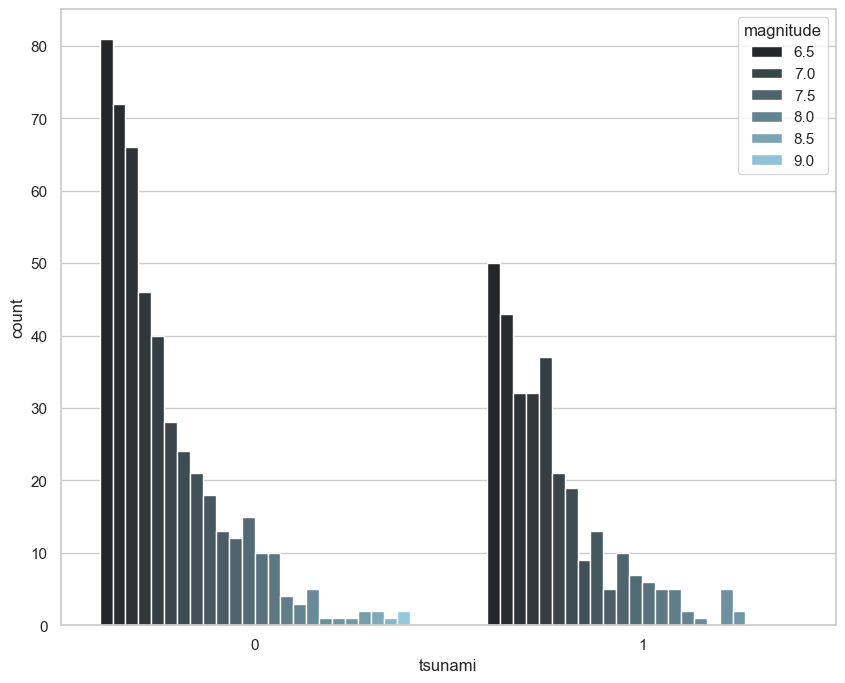

In [182]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='tsunami', hue='magnitude', color='skyblue');

In [200]:
df.head()

,magnitude,depth,latitude,longitude,cdi,dmin,gap,mmi,sig,Year,Month,tsunami
0,7.0,14.000,-9.7963,159.596,8,0.509,17.0,7,768,2022,11,1
1,6.9,25.000,-4.9559,100.738,4,2.229,34.0,4,735,2022,11,0
2,7.0,579.000,-20.0508,-178.346,3,3.125,18.0,3,755,2022,11,1
3,7.3,37.000,-19.2918,-172.129,5,1.865,21.0,5,833,2022,11,1
4,6.6,624.464,-25.5948,178.278,0,4.998,27.0,2,670,2022,11,1


## Moddeling
Choosing what features we will be using.

In [31]:
features = ['magnitude', 'depth', 'latitude', 'longitude', 'cdi', 'dmin', 'gap', 'mmi', 'sig', 'Year', 'Month']
target = 'tsunami'

df = df[features + [target]]


In [33]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.metrics import f1_score
import optuna

Standardizing features and Balancing train data.

In [35]:
sc = StandardScaler()

x = df.drop('tsunami',axis = 1)
y = df['tsunami']
x_scaled = sc.fit_transform(x)
x = pd.DataFrame(x_scaled,columns = x.columns)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [36]:
sm=SMOTE()
x_train,y_train=sm.fit_resample(x_train,y_train)

Divining models.

In [37]:
models = {
    "Logistic regression":LogisticRegression(),
    "Tree ":DecisionTreeClassifier(),
    "random Forest":RandomForestClassifier(),
    "xg":xgb.XGBClassifier(),
    'knn':KNeighborsClassifier(),
    'gnb':GaussianNB(),
    'nn':MLPClassifier(random_state=42)
}
f1scores = []

Making predictions and printing result for all the models.

In [216]:
for name,model in models.items():
    model.fit(x_train,y_train)
    p = model.predict(x_test)  
    print("Model: " , name)
    print("---------------------------------------------------")    
    print(classification_report(y_test,p))
    print(".....................................................|")

    f1 = f1_score(y_test, p)
    f1scores.append((name, f1))

Model:  Logistic regression
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       103
           1       0.83      0.93      0.88        54

    accuracy                           0.91       157
   macro avg       0.90      0.91      0.90       157
weighted avg       0.92      0.91      0.91       157

.....................................................|
Model:  Tree 
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       103
           1       0.88      0.94      0.91        54

    accuracy                           0.94       157
   macro avg       0.92      0.94      0.93       157
weighted avg       0.94      0.94      0.94       157

.....................................................|
Model:  random Forest
---------------------------------------------------
              pr

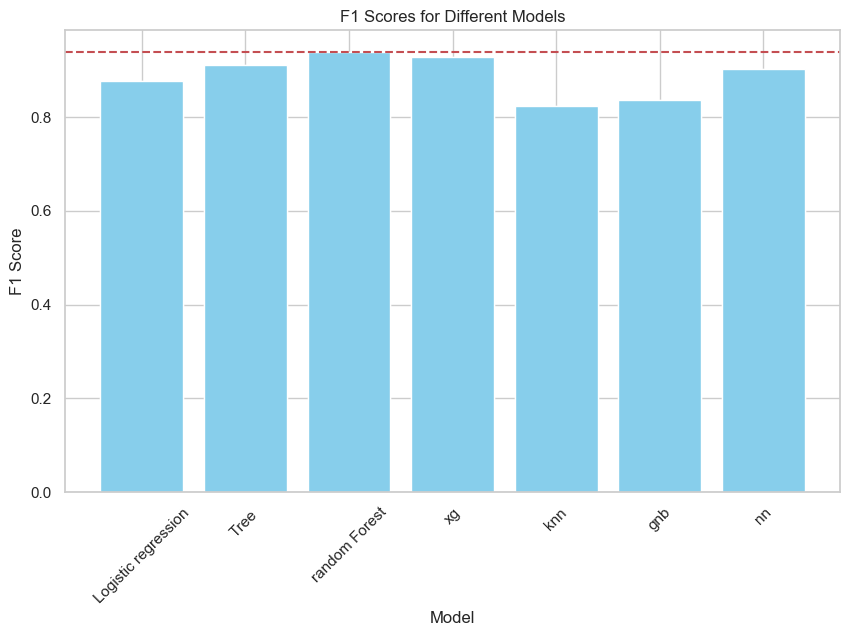

best f1 score was: ('xg', 0.9272727272727271)


In [223]:
model_names, f1_scores = zip(*f1scores)

plt.figure(figsize = (10, 6))
plt.bar(model_names, f1_scores, color = 'skyblue')
plt.axhline(max(f1_scores), color = 'r', linestyle='--')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Models')
plt.xticks(rotation=45)


plt.show()

print("best f1 score was:", max(f1scores))

## Hyperparameters
We will be focussing on xg and random forest because they perform the best.
library used is optuna, and we use optuna instead of grid search because Bayesian optimization works better.

In [38]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.15),
    }

    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(x_train, y_train)
    
    y_pred = xgb_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [209]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-11-07 09:19:46,273] A new study created in memory with name: no-name-d97ece71-82be-4c10-8e4f-6714388bb32e
[I 2023-11-07 09:19:46,504] Trial 0 finished with value: 0.9617834394904459 and parameters: {'n_estimators': 826, 'max_depth': 3, 'learning_rate': 0.029677780419723403}. Best is trial 0 with value: 0.9617834394904459.
[I 2023-11-07 09:19:46,707] Trial 1 finished with value: 0.9426751592356688 and parameters: {'n_estimators': 447, 'max_depth': 6, 'learning_rate': 0.0016189429160553075}. Best is trial 0 with value: 0.9617834394904459.
[I 2023-11-07 09:19:46,767] Trial 2 finished with value: 0.9554140127388535 and parameters: {'n_estimators': 184, 'max_depth': 4, 'learning_rate': 0.003390738330035933}. Best is trial 0 with value: 0.9617834394904459.
[I 2023-11-07 09:19:47,220] Trial 3 finished with value: 0.9490445859872612 and parameters: {'n_estimators': 971, 'max_depth': 7, 'learning_rate': 0.005836941899124466}. Best is trial 0 with value: 0.9617834394904459.
[I 2023-11-07

In [210]:
best_params = study.best_params
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.015307692598783482,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=743, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [211]:
y_pred = best_xgb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Final xg Accuracy: {accuracy}')

Final xg Accuracy: 0.9681528662420382


              precision    recall  f1-score   support

           0       0.99      0.96      0.98       103
           1       0.93      0.98      0.95        54

    accuracy                           0.97       157
   macro avg       0.96      0.97      0.97       157
weighted avg       0.97      0.97      0.97       157

Axes(0.125,0.11;0.62x0.77)


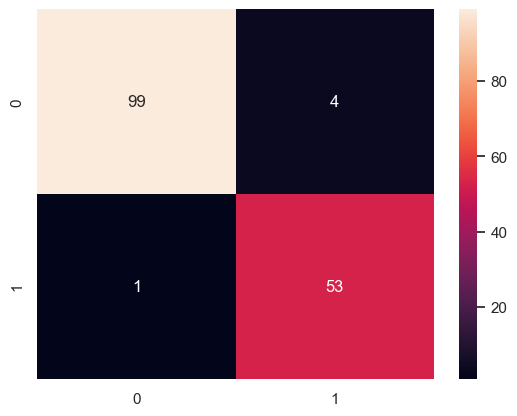

In [212]:
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))

In [213]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
    }

    rf_model = RandomForestClassifier(**params)
    rf_model.fit(x_train, y_train)
    
    y_pred = rf_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [214]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-11-07 09:20:42,955] A new study created in memory with name: no-name-b250ba7c-d9af-44b2-809e-2798bd13a578
[I 2023-11-07 09:20:43,990] Trial 0 finished with value: 0.9426751592356688 and parameters: {'n_estimators': 866, 'max_depth': 8}. Best is trial 0 with value: 0.9426751592356688.
[I 2023-11-07 09:20:44,993] Trial 1 finished with value: 0.9426751592356688 and parameters: {'n_estimators': 914, 'max_depth': 6}. Best is trial 0 with value: 0.9426751592356688.
[I 2023-11-07 09:20:45,146] Trial 2 finished with value: 0.9363057324840764 and parameters: {'n_estimators': 131, 'max_depth': 7}. Best is trial 0 with value: 0.9426751592356688.
[I 2023-11-07 09:20:45,274] Trial 3 finished with value: 0.9235668789808917 and parameters: {'n_estimators': 118, 'max_depth': 5}. Best is trial 0 with value: 0.9426751592356688.
[I 2023-11-07 09:20:45,762] Trial 4 finished with value: 0.9426751592356688 and parameters: {'n_estimators': 426, 'max_depth': 8}. Best is trial 0 with value: 0.942675159

In [217]:
best_params = study.best_params
best_forest_model = RandomForestClassifier(**best_params)
best_forest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=504)

In [218]:
y_pred = best_forest_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Final forest Accuracy: {accuracy}')

Final forest Accuracy: 0.9426751592356688


              precision    recall  f1-score   support

           0       0.98      0.93      0.96       103
           1       0.88      0.96      0.92        54

    accuracy                           0.94       157
   macro avg       0.93      0.95      0.94       157
weighted avg       0.95      0.94      0.94       157

Axes(0.125,0.11;0.62x0.77)


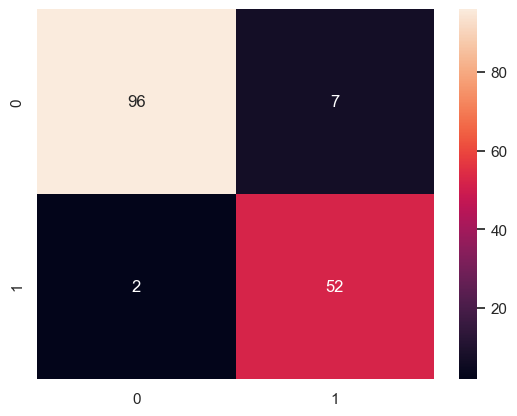

In [219]:
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))

## Performance and future ideas
XGBoost perfomed best after hyperparameters.
Future idea: distace to coast feature, how many km the earthquake was away from the nearest coast.